# EXPERIMENT NO 1 A

# (CONTRIBUTER :YOGESH)

In [1]:
# Importing libraries

import matplotlib.pyplot as plt
#from google.colab import files
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
#. mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

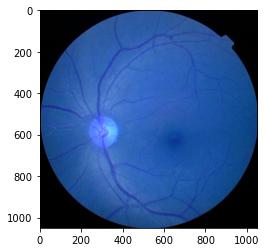

In [2]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:\\Users\\hp\\Downloads\\Cp\\Retina all"
CATEGORIES = ['0','1','2','3','4']

# a loop to read 1 image of a category to check if the code would work 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 100
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            training_data.append([new_array,class_num])

create_training_data()


len(training_data)

# empty lists to append images and labels
X = []
y = []

# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

len(X),len(y)

# importing library
from sklearn.model_selection import train_test_split

# splitting the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# normalising the data

X_train = X_train/255
X_test = X_test/255

# converting the train and test data into arrays

X_train = np.array(X_train)
X_test = np.array(X_test)

In [57]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [58]:
cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
cnn.fit(np.array(X_train), np.array(y_train), epochs=20)

Epoch 1/20
80/80 [==============================] - 39s 275ms/step - loss: 1.0301 - accuracy: 0.6110
Epoch 2/20
80/80 [==============================] - 20s 248ms/step - loss: 0.8387 - accuracy: 0.7121
Epoch 3/20
80/80 [==============================] - 20s 252ms/step - loss: 0.7939 - accuracy: 0.7207
Epoch 4/20
80/80 [==============================] - 20s 252ms/step - loss: 0.7607 - accuracy: 0.7376
Epoch 5/20
80/80 [==============================] - 20s 249ms/step - loss: 0.7375 - accuracy: 0.7376
Epoch 6/20
80/80 [==============================] - 21s 257ms/step - loss: 0.7212 - accuracy: 0.7454
Epoch 7/20
80/80 [==============================] - 20s 254ms/step - loss: 0.7106 - accuracy: 0.7442
Epoch 8/20
80/80 [==============================] - 20s 249ms/step - loss: 0.6928 - accuracy: 0.7552
Epoch 9/20
80/80 [==============================] - 20s 252ms/step - loss: 0.6803 - accuracy: 0.7540
Epoch 10/20
80/80 [==============================] - 20s 252ms/step - loss: 0.6758 - accura

In [60]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

35/35 [==============================] - 2s 68ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       531
           1       0.44      0.64      0.52       105
           2       0.62      0.75      0.68       305
           3       0.50      0.18      0.27        61
           4       0.43      0.03      0.06        93

    accuracy                           0.75      1095
   macro avg       0.59      0.51      0.50      1095
weighted avg       0.74      0.75      0.72      1095



In [61]:
cnn.save("modelM1a.h5")

# EXPERIMENT NO 1b optimizer'adam'

In [62]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [63]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
cnn.fit(np.array(X_train), np.array(y_train), epochs=20)

Epoch 1/20
80/80 [==============================] - 21s 251ms/step - loss: 1.1535 - accuracy: 0.5601
Epoch 2/20
80/80 [==============================] - 20s 253ms/step - loss: 0.8399 - accuracy: 0.7007
Epoch 3/20
80/80 [==============================] - 20s 256ms/step - loss: 0.7871 - accuracy: 0.7195
Epoch 4/20
80/80 [==============================] - 20s 251ms/step - loss: 0.7445 - accuracy: 0.7297
Epoch 5/20
80/80 [==============================] - 20s 255ms/step - loss: 0.7162 - accuracy: 0.7462
Epoch 6/20
80/80 [==============================] - 20s 254ms/step - loss: 0.7016 - accuracy: 0.7474
Epoch 7/20
80/80 [==============================] - 20s 256ms/step - loss: 0.6798 - accuracy: 0.7571
Epoch 8/20
80/80 [==============================] - 21s 265ms/step - loss: 0.6646 - accuracy: 0.7595
Epoch 9/20
80/80 [==============================] - 21s 260ms/step - loss: 0.6608 - accuracy: 0.7630
Epoch 10/20
80/80 [==============================] - 20s 252ms/step - loss: 0.6509 - accura

In [65]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

35/35 [==============================] - 2s 68ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.56      0.50      0.53       105
           2       0.62      0.81      0.70       305
           3       0.45      0.23      0.30        61
           4       0.41      0.10      0.16        93

    accuracy                           0.76      1095
   macro avg       0.60      0.52      0.53      1095
weighted avg       0.74      0.76      0.74      1095



In [66]:
cnn.save("modelM1b.h5")

# EXPERIMENT 1C image 100,100,3 convd layer 64,128,256  activation =relu   dense 128

In [67]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=30)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/30
80/80 [==============================] - 26s 314ms/step - loss: 0.9995 - accuracy: 0.6216
Epoch 2/30
80/80 [==============================] - 25s 311ms/step - loss: 0.7934 - accuracy: 0.7172
Epoch 3/30
80/80 [==============================] - 25s 309ms/step - loss: 0.7492 - accuracy: 0.7344
Epoch 4/30
80/80 [==============================] - 25s 313ms/step - loss: 0.7227 - accuracy: 0.7474
Epoch 5/30
80/80 [==============================] - 25s 310ms/step - loss: 0.6869 - accuracy: 0.7524
Epoch 6/30
80/80 [==============================] - 25s 312ms/step - loss: 0.6881 - accuracy: 0.7571
Epoch 7/30
80/80 [==============================] - 25s 313ms/step - loss: 0.6656 - accuracy: 0.7583
Epoch 8/30
80/80 [==============================] - 25s 309ms/step - loss: 0.6364 - accuracy: 0.7677
Epoch 9/30
80/80 [==============================] - 25s 311ms/step - loss: 0.6171 - accuracy: 0.7720
Epoch 10/30
80/80 [==============================] - 25s 312ms/step - loss: 0.6041 - accura

In [68]:
cnn.save("modelM1c.h5")

# EXPERIMENT 1Dimage 100,100,3 convd layer 64,128,256  activation =tanh  dense 128

In [69]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='tanh', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='tanh'), 
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=30)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))



Epoch 1/30
80/80 [==============================] - 28s 343ms/step - loss: 0.9336 - accuracy: 0.6616
Epoch 2/30
80/80 [==============================] - 27s 337ms/step - loss: 0.7867 - accuracy: 0.7180
Epoch 3/30
80/80 [==============================] - 28s 345ms/step - loss: 0.7301 - accuracy: 0.7403
Epoch 4/30
80/80 [==============================] - 27s 336ms/step - loss: 0.6996 - accuracy: 0.7438
Epoch 5/30
80/80 [==============================] - 28s 348ms/step - loss: 0.6728 - accuracy: 0.7595
Epoch 6/30
80/80 [==============================] - 27s 341ms/step - loss: 0.6439 - accuracy: 0.7720
Epoch 7/30
80/80 [==============================] - 27s 340ms/step - loss: 0.6280 - accuracy: 0.7740
Epoch 8/30
80/80 [==============================] - 27s 341ms/step - loss: 0.5912 - accuracy: 0.7807
Epoch 9/30
80/80 [==============================] - 27s 342ms/step - loss: 0.5758 - accuracy: 0.7854
Epoch 10/30
80/80 [==============================] - 27s 342ms/step - loss: 0.5409 - accura

In [70]:
cnn.save("modelM1d.h5")

# experiment 1 I STRATIFIED Y, image 100,100,3 convd layer 64,128,256  activation =tanh  dense 128

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

# normalising the data

X_train = X_train/255
X_test = X_test/255

# converting the train and test data into arrays

X_train = np.array(X_train)
X_test = np.array(X_test)


In [72]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='tanh', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=30)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))





Epoch 1/30
80/80 [==============================] - 29s 362ms/step - loss: 0.9449 - accuracy: 0.6671
Epoch 2/30
80/80 [==============================] - 27s 338ms/step - loss: 0.8036 - accuracy: 0.7109
Epoch 3/30
80/80 [==============================] - 27s 342ms/step - loss: 0.7383 - accuracy: 0.7321
Epoch 4/30
80/80 [==============================] - 27s 340ms/step - loss: 0.7107 - accuracy: 0.7477
Epoch 5/30
80/80 [==============================] - 27s 344ms/step - loss: 0.6716 - accuracy: 0.7540
Epoch 6/30
80/80 [==============================] - 27s 342ms/step - loss: 0.6570 - accuracy: 0.7564
Epoch 7/30
80/80 [==============================] - 27s 338ms/step - loss: 0.6277 - accuracy: 0.7756
Epoch 8/30
80/80 [==============================] - 29s 359ms/step - loss: 0.6106 - accuracy: 0.7712
Epoch 9/30
80/80 [==============================] - 29s 368ms/step - loss: 0.5801 - accuracy: 0.7869
Epoch 10/30
80/80 [==============================] - 28s 355ms/step - loss: 0.5471 - accura

In [73]:
cnn.save("modelM1e.h5")

# experiment 1 J STRATIFIED Y,test size=0.15 image 100,100,3 convd layer 64,128,256  activation =tanh  dense 128

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify=y)

# normalising the data

X_train = X_train/255
X_test = X_test/255

# converting the train and test data into arrays

X_train = np.array(X_train)
X_test = np.array(X_test)

In [79]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='tanh', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=30)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/30
97/97 [==============================] - 34s 342ms/step - loss: 0.9370 - accuracy: 0.6635
Epoch 2/30
97/97 [==============================] - 33s 342ms/step - loss: 0.7855 - accuracy: 0.7177
Epoch 3/30
97/97 [==============================] - 33s 343ms/step - loss: 0.7498 - accuracy: 0.7390
Epoch 4/30
97/97 [==============================] - 33s 344ms/step - loss: 0.7036 - accuracy: 0.7413
Epoch 5/30
97/97 [==============================] - 33s 345ms/step - loss: 0.6959 - accuracy: 0.7494
Epoch 6/30
97/97 [==============================] - 33s 341ms/step - loss: 0.6649 - accuracy: 0.7513
Epoch 7/30
97/97 [==============================] - 33s 344ms/step - loss: 0.6241 - accuracy: 0.7742
Epoch 8/30
97/97 [==============================] - 33s 343ms/step - loss: 0.6077 - accuracy: 0.7742
Epoch 9/30
97/97 [==============================] - 33s 342ms/step - loss: 0.5764 - accuracy: 0.7826
Epoch 10/30
97/97 [==============================] - 33s 341ms/step - loss: 0.5439 - accura

In [80]:
cnn.save("modelM1f.h5")

# eye image cropped and grayscale,and gaussian blur, test size .15 STRATIFY Y , image 100,100,3 convd layer 64,128,256  activation =relu dense 128

In [33]:
def crop_image_from_gray(img, tol=7):
    """
    Applies masks to the orignal image and 
    returns the a preprocessed image with 
    3 channels
    
    :param img: A NumPy Array that will be cropped
    :param tol: The tolerance used for masking
    
    :return: A NumPy array containing the cropped image
    """
    # If for some reason we only have two channels
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    # If we have a normal RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
    
def preprocess_image(image, sigmaX=10):
    """
    The whole preprocessing pipeline:
    1. Read in image
    2. Apply masks
    3. Resize image to desired size
    4. Add Gaussian noise to increase Robustness
    
    :param img: A NumPy Array that will be cropped
    :param sigmaX: Value used for add GaussianBlur to the image
    
    :return: A NumPy array containing the preprocessed image
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image


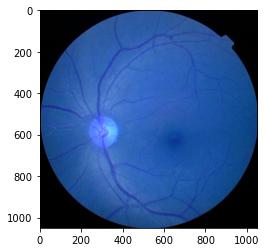

Epoch 1/30
97/97 [==============================] - 35s 351ms/step - loss: 0.9953 - accuracy: 0.6352
Epoch 2/30
97/97 [==============================] - 31s 324ms/step - loss: 0.8137 - accuracy: 0.7087
Epoch 3/30
97/97 [==============================] - 32s 325ms/step - loss: 0.7590 - accuracy: 0.7303
Epoch 4/30
97/97 [==============================] - 31s 322ms/step - loss: 0.6921 - accuracy: 0.7535
Epoch 5/30
97/97 [==============================] - 32s 326ms/step - loss: 0.6482 - accuracy: 0.7623
Epoch 6/30
97/97 [==============================] - 33s 337ms/step - loss: 0.6140 - accuracy: 0.7771
Epoch 7/30
97/97 [==============================] - 32s 326ms/step - loss: 0.5820 - accuracy: 0.7858
Epoch 8/30
97/97 [==============================] - 31s 323ms/step - loss: 0.5557 - accuracy: 0.7913
Epoch 9/30
97/97 [==============================] - 32s 328ms/step - loss: 0.5213 - accuracy: 0.8055
Epoch 10/30
97/97 [==============================] - 32s 330ms/step - loss: 0.4847 - accura

In [34]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:\\Users\\hp\\Downloads\\Cp\\Retina all"
CATEGORIES = ['0','1','2','3','4']

# a loop to read 1 image of a category to check if the code would work 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 100
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = preprocess_image(cv2.imread(os.path.join(path,img)))
            try:
                new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            training_data.append([new_array,class_num])

create_training_data()


len(training_data)

# empty lists to append images and labels
X = []
y = []

# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

len(X),len(y)

# importing library
from sklearn.model_selection import train_test_split

# splitting the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify=y)

# normalising the data

X_train = X_train/255
X_test = X_test/255

# converting the train and test data into arrays

X_train = np.array(X_train)
X_test = np.array(X_test)

cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=30)


y_pred = cnn.predict(X_test)


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [35]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(np.array(X_train), np.array(y_train), epochs=15)


y_pred = cnn.predict(X_test)


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/15
97/97 [==============================] - 33s 327ms/step - loss: 0.9771 - accuracy: 0.6365
Epoch 2/15
97/97 [==============================] - 32s 328ms/step - loss: 0.8196 - accuracy: 0.7013
Epoch 3/15
97/97 [==============================] - 31s 323ms/step - loss: 0.7494 - accuracy: 0.7361
Epoch 4/15
97/97 [==============================] - 31s 322ms/step - loss: 0.6812 - accuracy: 0.7542
Epoch 5/15
97/97 [==============================] - 31s 320ms/step - loss: 0.6357 - accuracy: 0.7655
Epoch 6/15
97/97 [==============================] - 31s 323ms/step - loss: 0.6144 - accuracy: 0.7800
Epoch 7/15
97/97 [==============================] - 32s 325ms/step - loss: 0.5739 - accuracy: 0.7874
Epoch 8/15
97/97 [==============================] - 31s 322ms/step - loss: 0.5468 - accuracy: 0.7935
Epoch 9/15
97/97 [==============================] - 31s 322ms/step - loss: 0.5190 - accuracy: 0.8106
Epoch 10/15
97/97 [==============================] - 31s 322ms/step - loss: 0.4603 - accura

In [ ]:
cnn.save('model01234stratify25FEB.h5')